## Imports

In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tabulate import tabulate

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

## 00 Loading data

In [348]:
data_path="../data/"

folders = ["A", "B", "C"]
dataframes = {f : {} for f in folders}
for folder in folders:
    for file in os.listdir(data_path + folder + "/"):
        filename=file.split(".")[0]
        dataframes[folder][filename]=pd.read_parquet(data_path + folder + "/"+ file)
df_selected_test_rows = pd.read_csv('../data/test.csv')
#iterates through dataframes
for folder, files_dict in dataframes.items():
    print(f"Folder: {folder}")
    for filename in files_dict.keys():
        print(f"  File: {filename}  Shape:  {files_dict[filename].shape}")

Folder: A
  File: train_targets  Shape:  (34085, 2)
  File: X_test_estimated  Shape:  (2880, 47)
  File: X_train_estimated  Shape:  (17576, 47)
  File: X_train_observed  Shape:  (118669, 46)
Folder: B
  File: train_targets  Shape:  (32848, 2)
  File: X_test_estimated  Shape:  (2880, 47)
  File: X_train_estimated  Shape:  (17576, 47)
  File: X_train_observed  Shape:  (116929, 46)
Folder: C
  File: train_targets  Shape:  (32155, 2)
  File: X_test_estimated  Shape:  (2880, 47)
  File: X_train_estimated  Shape:  (17576, 47)
  File: X_train_observed  Shape:  (116825, 46)


## 01 Clean data

### NaN values -columns

##### X_train_observed


In [349]:
filename = "X_train_observed"
for location in ['A','B','C']:
    #for filename in files_dict.keys():
    string = dataframes[location][filename].isna().sum().sort_values(ascending = False).head()
    print(f'Nans for  {filename} {location}  :\n{string}')

Nans for  X_train_observed A  :
snow_density:kgm3       115945
ceiling_height_agl:m     22247
cloud_base_agl:m          8066
date_forecast                0
snow_water:kgm2              0
dtype: int64
Nans for  X_train_observed B  :
snow_density:kgm3       111201
ceiling_height_agl:m     18772
cloud_base_agl:m          7473
date_forecast                0
snow_water:kgm2              0
dtype: int64
Nans for  X_train_observed C  :
snow_density:kgm3       107593
ceiling_height_agl:m     19923
cloud_base_agl:m          8512
date_forecast                0
snow_water:kgm2              0
dtype: int64


##### X_train_estimated

In [350]:
filename = "X_train_estimated"
for location in ['A','B','C']:
    #for filename in files_dict.keys():
    string = dataframes[location][filename].isna().sum().sort_values(ascending = False).head()
    print(f'Nans for  {filename} {location}  :\n{string}')

Nans for  X_train_estimated A  :
snow_density:kgm3       15769
ceiling_height_agl:m     3919
cloud_base_agl:m         2094
date_calc                   0
snow_water:kgm2             0
dtype: int64
Nans for  X_train_estimated B  :
snow_density:kgm3       15713
ceiling_height_agl:m     3689
cloud_base_agl:m         1963
date_calc                   0
snow_water:kgm2             0
dtype: int64
Nans for  X_train_estimated C  :
snow_density:kgm3       13898
ceiling_height_agl:m     4596
cloud_base_agl:m         2804
date_calc                   0
snow_water:kgm2             0
dtype: int64


##### X_test_estimated


In [351]:
filename = "X_test_estimated"
for location in ['A','B','C']:
    #for filename in files_dict.keys():
    string = dataframes[location][filename].isna().sum().sort_values(ascending = False).head()
    print(f'Nans for  {filename} {location}  :\n{string}')


Nans for  X_test_estimated A  :
snow_density:kgm3       2880
ceiling_height_agl:m     793
cloud_base_agl:m         298
date_calc                  0
snow_water:kgm2            0
dtype: int64
Nans for  X_test_estimated B  :
snow_density:kgm3       2880
ceiling_height_agl:m     755
cloud_base_agl:m         277
date_calc                  0
snow_water:kgm2            0
dtype: int64
Nans for  X_test_estimated C  :
snow_density:kgm3       2880
ceiling_height_agl:m     849
cloud_base_agl:m         375
date_calc                  0
snow_water:kgm2            0
dtype: int64


##### train_targets


In [352]:
filename = "train_targets"
for location in ['A','B','C']:
    #for filename in files_dict.keys():
    string = dataframes[location][filename].isna().sum().sort_values(ascending = False).head()
    print(f'Nans for  {filename} {location}  :\n{string}')

Nans for  train_targets A  :
time              0
pv_measurement    0
dtype: int64
Nans for  train_targets B  :
pv_measurement    4
time              0
dtype: int64
Nans for  train_targets C  :
pv_measurement    6060
time                 0
dtype: int64


### Removing rows with NaN for ceiling_height cloud_base and PV

In [353]:
### Remove in feature engineering
# snow density -> remove column
# ceiligh height -> remove rows with ceiling height = NaN
# cloud base -> remove rows with cloud base = NaN
# pv-values -> remove rows where PV = 0
def remove_nan_rows(df, columns):
    # Drop rows where any of the specified columns have NaN values
    clean_df = df.dropna(subset=columns)
    return clean_df

#cleaned_data = remove_nan_rows(data, ['ceiling_height_agl:m', 'cloud_base_agl:m'])
for folder, files_dict in dataframes.items():
    for filename in files_dict.keys():
        if filename != 'train_targets':
            dataframes[folder][filename] = remove_nan_rows(dataframes[folder][filename], ['ceiling_height_agl:m', 'cloud_base_agl:m'])
        else:
            dataframes[folder][filename] = remove_nan_rows(dataframes[folder][filename], ['pv_measurement'])

### Saving as dataframes

### Saving as dfs

In [354]:
X_train_observed_A = dataframes['A']['X_train_observed']
X_train_estimated_A = dataframes['A']['X_train_estimated']
X_test_estimated_A = dataframes['A']['X_test_estimated']
train_targets_A = dataframes['A']['train_targets']

#A_X_dfs = [X_train_observed_A, X_train_estimated_A, X_test_estimated_A]

X_train_observed_B = dataframes['B']['X_train_observed']
X_train_estimated_B = dataframes['B']['X_train_observed']
X_test_estimated_B = dataframes['B']['X_test_estimated']
train_targets_B = dataframes['B']['train_targets']

#B_X_dfs = [X_train_observed_B, X_train_estimated_B, X_test_estimated_B]

X_train_observed_C = dataframes['C']['X_train_observed']
X_train_estimated_C = dataframes['C']['X_train_observed']
X_test_estimated_C = dataframes['C']['X_test_estimated']
train_targets_C = dataframes['C']['train_targets']

#C_X_dfs = [X_train_observed_C, X_train_estimated_C, X_test_estimated_C]

#### Cleaning


### Remove weird PV measurements

In [355]:
train_targets_B['pv_measurement'].value_counts()

pv_measurement
0.000000      17312
183.712500     1076
27.600000       493
34.500000       406
81.937500       369
              ...  
43.837497         1
23.235966         1
32.774857         1
4.562625          1
0.828587          1
Name: count, Length: 2567, dtype: int64

## 03 Feature engineering

In [356]:
### Adding date_calc = NaN to observed values
X_train_observed_A['date_calc'] = np.nan
X_train_observed_B['date_calc'] = np.nan
X_train_observed_C['date_calc'] = np.nan

##### Observed/estimated and fill date_calc with date_forecast

In [357]:
### Adding observed and estimated feature
def add_observed_estimated_category(df):
    ### Adding attribute "estimated" og "observed"
    #df["observed/estimated"] = np.where(pd.isna(df['date_calc']), 0, 1) #observed = 0, estimated = 1
    df['observed(1)/estimated(0)'] = df['date_calc'].isna().astype(int)
    return df

### Fill observed weather's Na values with "date_forecast"
def fill_date_calc_w_date_forecast(df):
    df["date_calc"]= df["date_calc"].fillna(df["date_forecast"])
    return df


##### Add hour, day, month

In [358]:
import pandas as pd
import numpy as np

def create_time_features(df, date_column='date_forecast'):
    """
    Create time-related features for time series forecasting based on the specified date column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the date column.
    date_column (str): The name of the column containing the datetime64 data.

    Returns:
    pd.DataFrame: A DataFrame with new time-related features.
    """
    # Ensure the date_column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column])

    # Day of year
    df['day_of_year'] = df[date_column].dt.dayofyear
    # Month
    df['month'] = df[date_column].dt.month
    # Hour
    df['hour'] = df[date_column].dt.hour

    # Create cos and sin components for cyclic nature of time
    df['cos_day_of_year'] = np.cos(2 * np.pi * df['day_of_year'] / 365.25)
    df['sin_day_of_year'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)

    df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)
    df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)

    df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)

    return df



In [359]:
#merged_observed_A.columns

##### Sun features

In [360]:
#df_train.describe()
def add_normalized_distance_from_middle(df):
    max_distance = 12
    df['distance_from_11'] = abs(df['hour'] - 11)
    return df
month_mapping = { 'January': 1,    'February': 2,    'March': 3,    'April': 4,    'May': 5,    'June': 6,    'July': 7,
'August': 6,    'September': 5,    'October': 4,    'November': 3,    'December': 2}

def add_sun_features(df):
    #df['elevation_cloud_interaction'] = df['sun_elevation:d'] * df['effective_cloud_cover:p']
    df['direct_rad_cloud_interaction'] = df['direct_rad:W'] * (1- df['effective_cloud_cover:p'])
    #df['cos_elevation'] = np.cos(np.radians(90 - df['sun_elevation:d']))
    #df['sun_elevation_squared'] = df['sun_elevation:d'] ** 2
    #df['sun_elevation_month_interaction'] = df['sun_elevation:d'] * df['month'].map(month_mapping)
    return df

### Adding features

In [361]:
def add_all_features(df):
    add_observed_estimated_category(df)
    create_time_features(df)
    add_normalized_distance_from_middle(df)
    add_sun_features(df)
    return df

###### Adding features function

In [362]:
print(X_train_observed_A.shape)

X_train_observed_A = add_all_features(X_train_observed_A)
X_train_estimated_A = add_all_features(X_train_estimated_A)
X_test_estimated_A = add_all_features(X_test_estimated_A)
X_train_observed_B = add_all_features(X_train_observed_B)
X_train_estimated_B = add_all_features(X_train_estimated_B)
X_test_estimated_B = add_all_features(X_test_estimated_B)
X_train_observed_C = add_all_features(X_train_observed_C)
X_train_estimated_C = add_all_features(X_train_estimated_C)
X_test_estimated_C = add_all_features(X_test_estimated_C)

print(X_train_observed_A.shape)


(96177, 47)
(96177, 59)


In [363]:
X_train_observed_A.columns

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

### Dropping features

##### Features to drop

In [364]:
keywords = [
    'snow_density', 'elevation'
]

###### Dropping features function

In [365]:
def drop_columns_from_df(df, keywords_to_drop):
    cols_to_drop = [col for col in df.columns if any(keyword in col for keyword in keywords_to_drop)]
    df = df.drop(columns=cols_to_drop)
    return df

In [366]:
X_train_observed_A = drop_columns_from_df(X_train_observed_A, keywords)
X_train_estimated_A = drop_columns_from_df(X_train_estimated_A, keywords)
X_test_estimated_A = drop_columns_from_df(X_test_estimated_A, keywords)
X_train_observed_B = drop_columns_from_df(X_train_observed_B, keywords)
X_train_estimated_B = drop_columns_from_df(X_train_estimated_B, keywords)
X_test_estimated_B = drop_columns_from_df(X_test_estimated_B, keywords)
X_train_observed_C = drop_columns_from_df(X_train_observed_C, keywords)
X_train_estimated_C = drop_columns_from_df(X_train_estimated_C, keywords)
X_test_estimated_C = drop_columns_from_df(X_test_estimated_C, keywords)

In [367]:
print(X_train_observed_A.shape)
X_train_observed_A.columns

(96177, 56)


Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'fresh_snow_12h:cm', 'fresh_snow_1h:cm',
       'fresh_snow_24h:cm', 'fresh_snow_3h:cm', 'fresh_snow_6h:cm',
       'is_day:idx', 'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p',
       'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms',
       'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms', 'date_calc'

## 04 Preparing data for model

##### Merging code

In [368]:
# Merge X_train_observed_A with train_targets_A
merged_observed_A = pd.merge(X_train_observed_A, train_targets_A,
                             left_on='date_forecast',
                             right_on='time',
                             how='inner')

# Merge X_train_estimated_A with train_targets_A
merged_estimated_A = pd.merge(X_train_estimated_A, train_targets_A,
                              left_on='date_forecast',
                              right_on='time',
                              how='inner')
#B
merged_observed_B = pd.merge(X_train_observed_B, train_targets_B,
                             left_on='date_forecast',
                             right_on='time',
                             how='inner')

# Merge X_train_estimated_A with train_targets_A
merged_estimated_B = pd.merge(X_train_estimated_B, train_targets_B,
                              left_on='date_forecast',
                              right_on='time',
                              how='inner')
#C
merged_observed_C = pd.merge(X_train_observed_C, train_targets_C,
                             left_on='date_forecast',
                             right_on='time',
                             how='inner')

# Merge X_train_estimated_A with train_targets_A
merged_estimated_C = pd.merge(X_train_estimated_C, train_targets_C,
                              left_on='date_forecast',
                              right_on='time',
                              how='inner')

##### Converting to numeric time format

###### Conversion code

In [369]:

def preprocess_dataframe(df, time_col, date_cols):
    """
    Preprocess the dataframe by removing the time column and converting date columns to numeric values.

    Parameters:
    df (pd.DataFrame): The DataFrame to preprocess.
    time_col (str): The name of the time column to remove.
    date_cols (list): A list of date column names to convert to numeric.

    Returns:
    pd.DataFrame: The preprocessed DataFrame.
    """
    # Remove the time column
    if not time_col == 'testing':
        df = df.drop(columns=[time_col])

    # Convert 'date_forecast' and 'date_calc' to numeric (epoch time)
    for date_col in date_cols:
        # Ensure the column is in datetime format
        df[date_col] = pd.to_datetime(df[date_col])

        # Convert datetime to numeric (epoch time)
        df[date_col] = (df[date_col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

    return df

merged_observed_A = preprocess_dataframe(merged_observed_A, 'time', ['date_forecast', 'date_calc'])
merged_estimated_A = preprocess_dataframe(merged_estimated_A, 'time', ['date_forecast', 'date_calc'])
X_test_estimated_A = preprocess_dataframe(X_test_estimated_A, 'testing', ['date_forecast', 'date_calc'])

merged_observed_B = preprocess_dataframe(merged_observed_B, 'time', ['date_forecast', 'date_calc'])
merged_estimated_B = preprocess_dataframe(merged_estimated_B, 'time', ['date_forecast', 'date_calc'])
X_test_estimated_B = preprocess_dataframe(X_test_estimated_B, 'testing', ['date_forecast', 'date_calc'])

merged_observed_C = preprocess_dataframe(merged_observed_C, 'time', ['date_forecast', 'date_calc'])
merged_estimated_C = preprocess_dataframe(merged_estimated_C, 'time', ['date_forecast', 'date_calc'])
X_test_estimated_C = preprocess_dataframe(X_test_estimated_C, 'testing', ['date_forecast', 'date_calc'])

##### Removing weird PV for B

In [370]:

# Assuming 'merged_estimated_B' is a DataFrame and 'date_forecast' is in a proper datetime format
merged_estimated_B.plot(x='date_forecast', y='pv_measurement', figsize=(10,5))
# Labeling the axes
plt.xlabel('Date Forecast')
plt.ylabel('PV Measurement')
# Title for the plot
plt.title('PV Measurement Over Time')
plt.show()


Text(0.5, 1.0, 'PV Measurement Over Time (Filtered)')

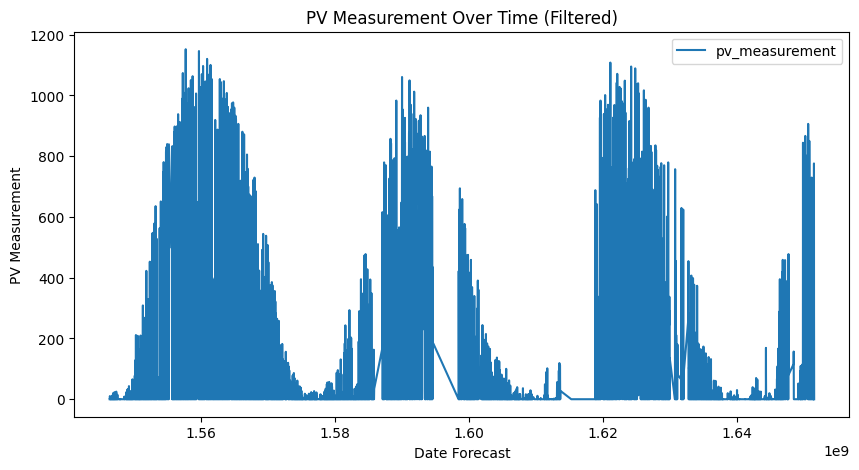

In [371]:
def remove_constant_nonzero_rows(df, column_name, min_consecutive=1):
    # Identify rows where the value in the specified column stays constant for the given minimum number of consecutive rows
    # And where the value is not 0
    mask = df[column_name].rolling(window=min_consecutive, center=False).apply(
        lambda x: (x.nunique() == 1) and (x.iloc[0] != 0)
    )
    # Filter out the constant non-zero rows
    df_filtered = df[mask != 1]
    return df_filtered


# Usage
min_consecutive = 6  # Define the minimum number of consecutive rows with the same value to be removed
#merged_estimated_B_filtered = remove_constant_nonzero_rows(merged_estimated_B, 'pv_measurement', min_consecutive)
merged_estimated_B = remove_constant_nonzero_rows(merged_estimated_B, 'pv_measurement', min_consecutive)

# Now you can plot the filtered DataFrame
merged_estimated_B.plot(x='date_forecast', y='pv_measurement', figsize=(10,5))
plt.xlabel('Date Forecast')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time (Filtered)')
#plt.show()


##### Removing weird PV for B

Text(0.5, 1.0, 'PV Measurement Over Time')

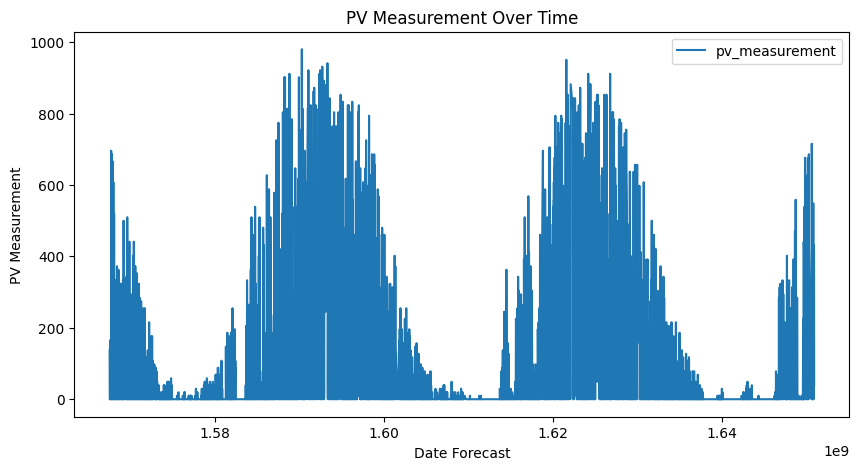

In [372]:
# Assuming 'merged_estimated_B' is a DataFrame and 'date_forecast' is in a proper datetime format
merged_estimated_C.plot(x='date_forecast', y='pv_measurement', figsize=(10,5))
# Labeling the axes
plt.xlabel('Date Forecast')
plt.ylabel('PV Measurement')
# Title for the plot
plt.title('PV Measurement Over Time')
#plt.show()


Text(0.5, 1.0, 'PV Measurement Over Time (Filtered)')

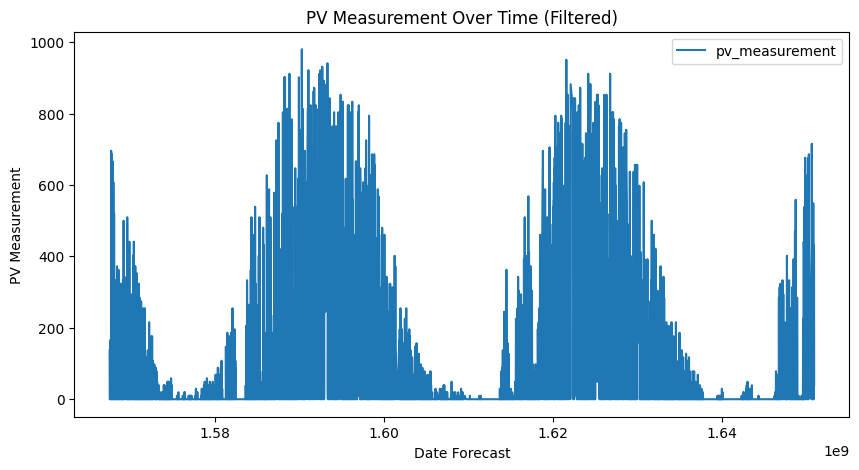

In [373]:
min_consecutive = 6  # Define the minimum number of consecutive rows with the same value to be removed
merged_estimated_C_filtered = remove_constant_nonzero_rows(merged_estimated_C, 'pv_measurement', min_consecutive)

# Now you can plot the filtered DataFrame
merged_estimated_C_filtered.plot(x='date_forecast', y='pv_measurement', figsize=(10,5))
plt.xlabel('Date Forecast')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time (Filtered)')
#plt.show()


##### Splitting into X and y

In [374]:
#Training data
X_observed_for_training_A = merged_observed_A.drop("pv_measurement", axis = 1)
y_observed_for_training_A = merged_observed_A["pv_measurement"]
#do not reshuffle

X_observed_for_training_B = merged_observed_B.drop("pv_measurement", axis = 1)
y_observed_for_training_B = merged_observed_B["pv_measurement"]

X_observed_for_training_C = merged_observed_C.drop("pv_measurement", axis = 1)
y_observed_for_training_C = merged_observed_C["pv_measurement"]

#Validation data

X_estimated_for_validation_A = merged_estimated_A.drop("pv_measurement", axis = 1)
y_estimated_validation_data_A = merged_estimated_A["pv_measurement"]

X_estimated_for_validation_B = merged_estimated_B.drop("pv_measurement", axis = 1)
y_estimated_validation_data_B = merged_estimated_B["pv_measurement"]

X_estimated_for_validation_C = merged_estimated_C.drop("pv_measurement", axis = 1)
y_estimated_validation_data_C = merged_estimated_C["pv_measurement"]


In [401]:
### Concating observed and estimated

X_training_A = pd.concat([X_observed_for_training_A, X_estimated_for_validation_A], axis=0)
X_training_A['date_calc'] = X_training_A['date_forecast']
X_training_A.isna().sum().sort_values()

y_training_A = pd.concat([y_observed_for_training_A, y_estimated_validation_data_A], axis=0)
y_training_A = pd.concat([y_observed_for_training_A, y_estimated_validation_data_A], axis=0)

#X_training_A.info()

In [406]:
X_training_A['month'].value_counts()

month
12    2431
1     2378
7     2368
3     2314
2     2277
8     2239
10    2231
11    2203
9     2177
6     2059
4     1912
5     1604
Name: count, dtype: int64

## 05 Model training

#### Pipeline construciton

###### Imports

In [375]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, LinearRegression
from catboost import CatBoostRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


##### Preprocessor

In [376]:
list_of_numerical_features = X_train_observed_A.select_dtypes(include=['number']).columns.tolist()
list_of_categorical_features = X_train_observed_A.select_dtypes(exclude=['number']).columns.tolist()
print("Numerical features:", list_of_numerical_features)
print("Non-numerical features:", list_of_categorical_features)

Numerical features: ['absolute_humidity_2m:gm3', 'air_density_2m:kgm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J', 'effective_cloud_cover:p', 'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'snow_depth:cm', 'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms', 'date_calc', 'observed(1)/estimated(0)', 'day_of_year', 'month', 'hour', 'cos_day_of_year', 'sin_day_of_y

In [377]:

#Generic numerical transformer

numerical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    #('ceiling_hegiht_imputer', SimpleImputer(strategy='constant', fill_value=15000))
    #('cloud_base_agl:m_imputer', SimpleImputer())
])

#Generic categorical transformer
categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy= 'constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    
])
# Feature specific transformers - TBD
#...

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, list_of_numerical_features),
        #('cat', categorical_transformer, list_of_categorical_features)
    ]
)

##### Models

In [378]:
#model_A = RandomForestRegressor()
model_A = LGBMRegressor(verbose = -1)
model_B = LGBMRegressor(verbose = -1)
model_C = LGBMRegressor(verbose = -1)


pipeline_A = Pipeline( steps = [
    ('preprocessor', preprocessor),
    ('regressor', model_A)
])

pipeline_B = Pipeline( steps = [
    ('preprocessor', preprocessor),
    ('regressor', model_B)
])

pipeline_C = Pipeline( steps = [
    ('preprocessor', preprocessor),
    ('regressor', model_C)
])

# A

##### Training

In [379]:
pipeline_A.fit(X_observed_for_training_A,y_observed_for_training_A)

c:\Users\sver-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['date_calc']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['absolute_humidity_2m:gm3',
                                                   'air_density_2m:kgm3',
                                                   'ceiling_height_agl:m',
                                                   'clear_sky_energy_1h:J',
                                                   'clear_sky_rad:W',
                                                   'cloud_base_agl:m',
                                                   'dew_or_rime:idx',
                                                   'dew_point_2m:K',
                                                   'diffuse_rad:W',
                                                   'di...
                                                   'is_in_shadow:idx',
                                                   'msl_pressure:hPa',
                                                   'precip_5min:mm',
                                                   'precip_type_5min:idx',
                                                   'pressure_100m:hPa',
                                                   'pressure_50m:hPa',
                                                   'prob_rime:p',
                                                   'rain_water:kgm2',
                                                   'relative_humidity_1000hPa:p',
                                                   'sfc_pressure:hPa',
                                                   'snow_depth:cm', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['date_forecast'])])),
                ('regressor', LGBMRegressor(verbose=-1))])

#### Local MAE and Cross validation

###### Imports

In [380]:

y_pred_A = pipeline_A.predict(X_estimated_for_validation_A)
mae_A = mean_absolute_error(y_estimated_validation_data_A, y_pred_A)
print(f"Local Mean Absolute Error: {mae_A}")
#df_y_pred_A=pd.DataFrame(y_pred_A)

n_folds = 10
# Initialize time series cross-validator
tscv = TimeSeriesSplit(n_splits=n_folds)
# Compute cross-validated scores
scores = cross_val_score(pipeline_A, X_estimated_for_validation_A, y_estimated_validation_data_A, cv = tscv, scoring='neg_mean_absolute_error')
# The scores are negative because scikit-learn's convention is to maximize utilities and minimize costs
# Therefore, the actual MAE scores are the absolute values of the scores reported
scores = -scores
print(f'CROSS VALIDATION: {scores} \n Features:')
print(X_estimated_for_validation_A.columns)


c:\Users\sver-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['date_calc']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Local Mean Absolute Error: 101.85833690006578


CROSS VALIDATION: [146.44516547  44.46491743  27.32059745  29.55172859  80.83894123
  72.63462595 107.40634645 173.22462995 391.39595069 408.32731494] 
 Features:
Index(['date_calc', 'date_forecast', 'absolute_humidity_2m:gm3',
       'air_density_2m:kgm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J',
       'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx',
       'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
       'direct_rad_1h:J', 'effective_cloud_cover:p', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_depth:cm', 'snow_drift:idx', 'snow_melt_10min:mm',
       'snow_water:kgm2', 'sun_azimuth:d', 'super_cooled_liquid_water:kgm2

In [381]:
#pandas.concat([df1, df2], axis=0)


y_pred_A = pipeline_A.predict(X_estimated_for_validation_A)
mae_A = mean_absolute_error(y_estimated_validation_data_A, y_pred_A)
print(f"Local Mean Absolute Error: {mae_A}")
#df_y_pred_A=pd.DataFrame(y_pred_A)

n_folds = 10
# Initialize time series cross-validator
tscv = TimeSeriesSplit(n_splits=n_folds)
# Compute cross-validated scores
scores = cross_val_score(pipeline_A, X_estimated_for_validation_A, y_estimated_validation_data_A, cv = tscv, scoring='neg_mean_absolute_error')
# The scores are negative because scikit-learn's convention is to maximize utilities and minimize costs
# Therefore, the actual MAE scores are the absolute values of the scores reported
scores = -scores
print(scores)


Local Mean Absolute Error: 101.85833690006578


c:\Users\sver-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['date_calc']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[146.44516547  44.46491743  27.32059745  29.55172859  80.83894123
  72.63462595 107.40634645 173.22462995 391.39595069 408.32731494]


#### Plotting predictions vs actual

c:\Users\sver-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['date_calc']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


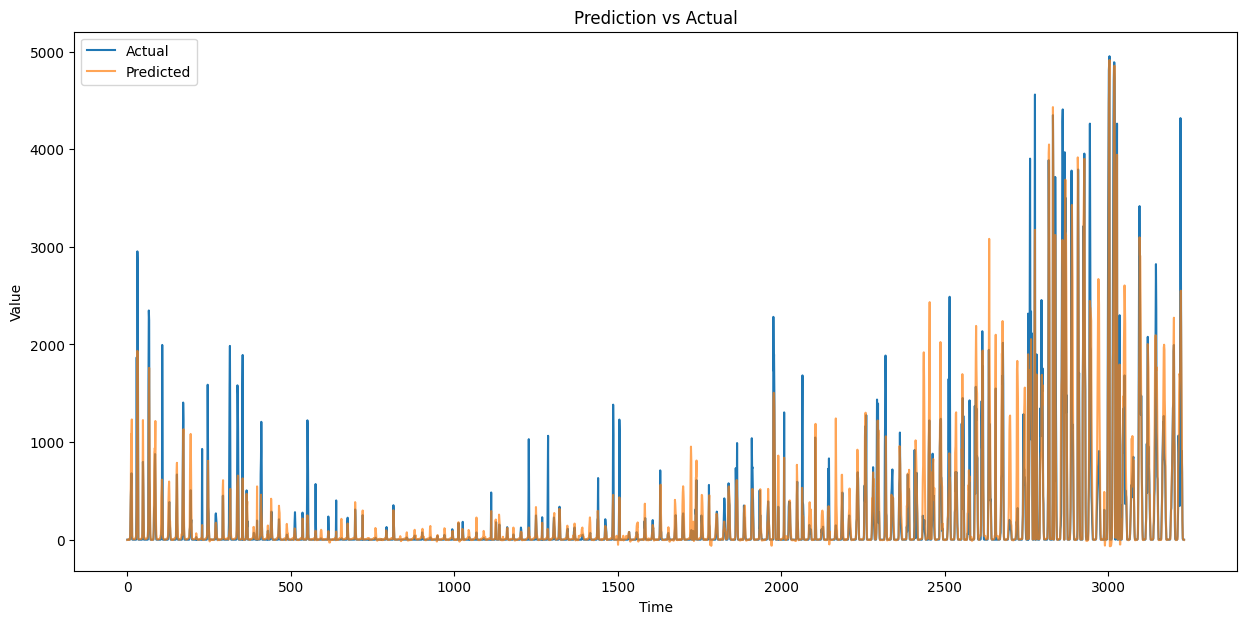

In [382]:
# Assuming y_pred_A are your predictions and y_true_A are the actual values
y_true_A = y_estimated_validation_data_A  # the actual values
y_pred_A = pipeline_A.predict(X_estimated_for_validation_A)  # the predicted values

plt.figure(figsize=(15, 7))
plt.plot(y_true_A, label='Actual')
plt.plot(y_pred_A, label='Predicted', alpha=0.7)
plt.title('Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


#### Plotting residual


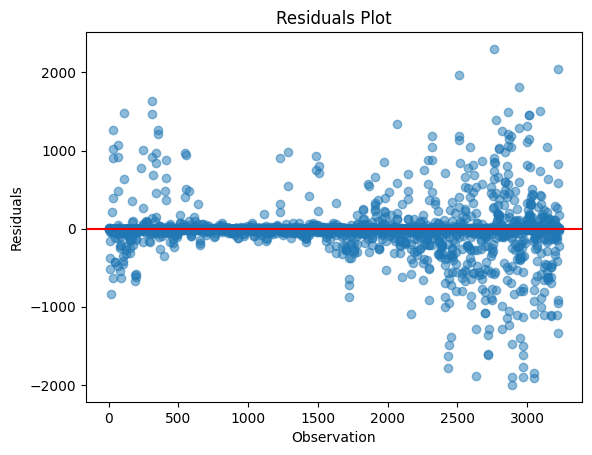

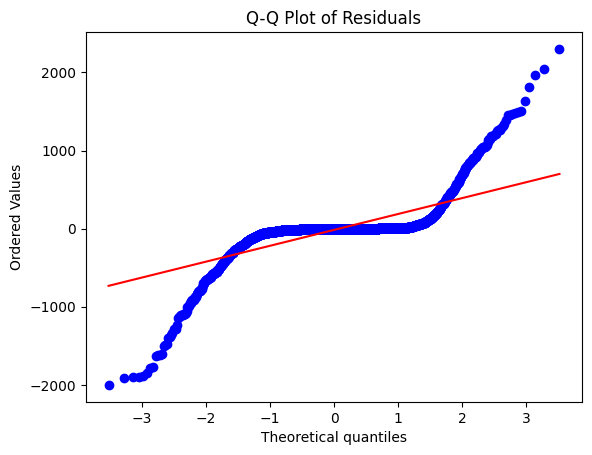

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Create a DataFrame from the actual and predicted values
df = pd.DataFrame({
    'Actual': y_true_A,
    'Predicted': y_pred_A
})

# Calculate the residuals
df['Residuals'] = df['Actual'] - df['Predicted']

# Scatter plot of residuals
plt.scatter(x=np.arange(len(df)), y=df['Residuals'], alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')  # Adds a reference line at zero
plt.show()

# Histogram of residuals
plt.hist(df['Residuals'], bins=20, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot for normality
stats.probplot(df['Residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


# B

In [384]:
pipeline_B.fit(X_observed_for_training_B,y_observed_for_training_B)

c:\Users\sver-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['date_calc']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['absolute_humidity_2m:gm3',
                                                   'air_density_2m:kgm3',
                                                   'ceiling_height_agl:m',
                                                   'clear_sky_energy_1h:J',
                                                   'clear_sky_rad:W',
                                                   'cloud_base_agl:m',
                                                   'dew_or_rime:idx',
                                                   'dew_point_2m:K',
                                                   'diffuse_rad:W',
                                                   'di...
                                                   'is_in_shadow:idx',
                                                   'msl_pressure:hPa',
                                                   'precip_5min:mm',
                                                   'precip_type_5min:idx',
                                                   'pressure_100m:hPa',
                                                   'pressure_50m:hPa',
                                                   'prob_rime:p',
                                                   'rain_water:kgm2',
                                                   'relative_humidity_1000hPa:p',
                                                   'sfc_pressure:hPa',
                                                   'snow_depth:cm', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['date_forecast'])])),
                ('regressor', LGBMRegressor(verbose=-1))])

In [385]:

y_pred_B = pipeline_B.predict(X_estimated_for_validation_B)
mae_B = mean_absolute_error(y_estimated_validation_data_B, y_pred_B)
print(f"Local Mean Absolute Error: {mae_B}")
#df_y_pred_B=pd.DataFrame(y_pred_B)

n_folds = 10
# Initialize time series cross-validator
tscv = TimeSeriesSplit(n_splits=n_folds)
# Compute cross-validated scores
scores = cross_val_score(pipeline_B, X_estimated_for_validation_B, y_estimated_validation_data_B, cv = tscv, scoring='neg_mean_absolute_error')
# The scores are negative because scikit-learn's convention is to maximize utilities and minimize costs
# Therefore, the actual MAE scores are the absolute values of the scores reported
scores = -scores
print(f'CROSS VALIDATION: {scores} \n Features:')
print(X_estimated_for_validation_B.columns)

c:\Users\sver-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['date_calc']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Local Mean Absolute Error: 24.69959000847637


c:\Users\sver-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['date_calc']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\sver-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['date_calc']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\sver-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['date_calc']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\sver-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['date_calc']. A

CROSS VALIDATION: [129.21027034  59.85500044  11.04035598  11.99517559  69.81349314
  14.46481559  41.76061561  72.54850477   5.29590639  26.18746955] 
 Features:
Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'fresh_snow_12h:cm', 'fresh_snow_1h:cm',
       'fresh_snow_24h:cm', 'fresh_snow_3h:cm', 'fresh_snow_6h:cm',
       'is_day:idx', 'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'super_cooled_liquid_water:kgm2', 't_1000hPa

c:\Users\sver-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['date_calc']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


### All validations

## 0X Post processing

## 0X Prepare for submission